<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

Generacja danych

[]

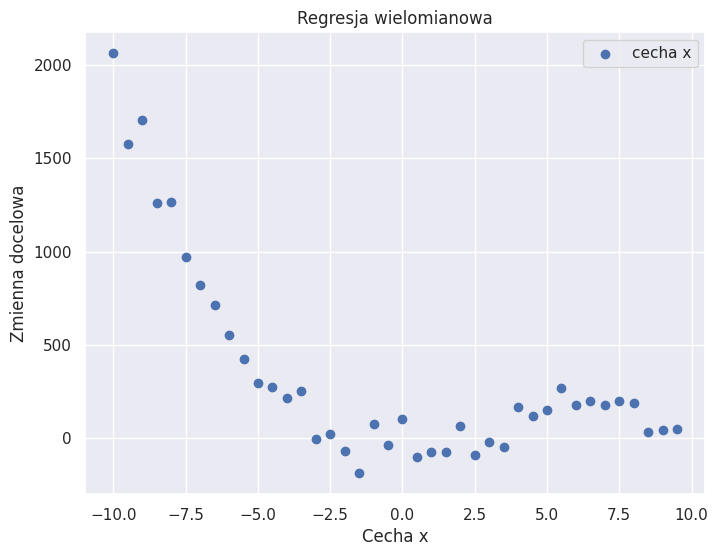

In [4]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X ** 3 + 10 * X ** 2 - 2 * X + 3 + noise
X= X.reshape(40, 1)

plt.figure(figsize = (8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label = 'cecha x')
plt.legend()
plt.plot()

[]

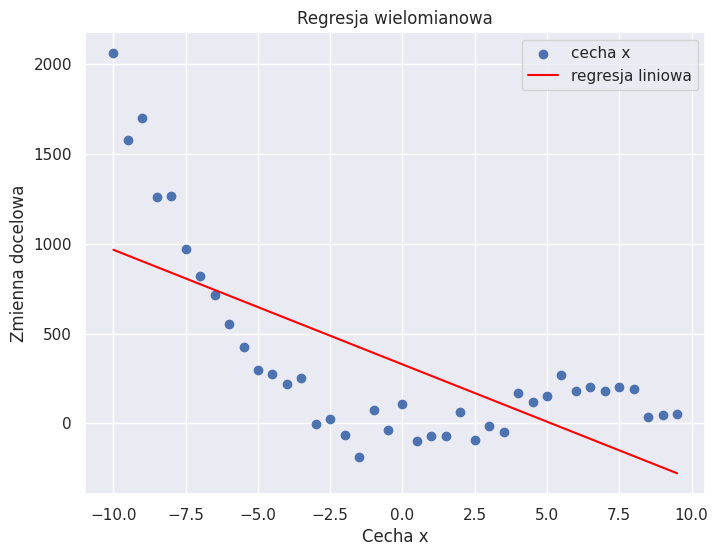

In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)


plt.figure(figsize = (8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label = 'cecha x')
plt.plot(X, y_pred_lin, c = 'red', label = 'regresja liniowa')
plt.legend()
plt.plot()

In [6]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.47626538508277905

Model niedouczony, trzeba zwiekszyc zlozonosc modelu

In [7]:
df = pd.DataFrame({'X': X.ravel()})
df.head()

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0


In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [9]:
X_poly.shape

(40, 3)

In [13]:
df = pd.DataFrame(X_poly)
df.columns = ['1', 'x', 'x^2']

In [14]:
df.head()

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00


[]

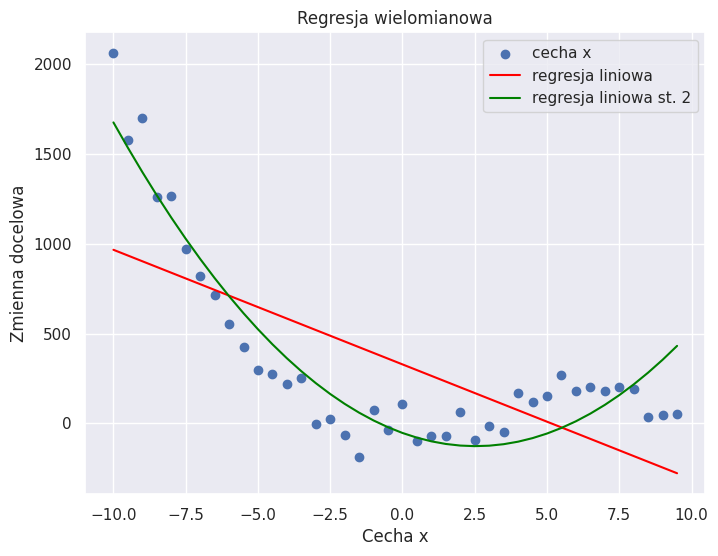

In [15]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)


plt.figure(figsize = (8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label = 'cecha x')
plt.plot(X, y_pred_lin, c = 'red', label = 'regresja liniowa')
plt.plot(X, y_pred_2, c = 'green', label = 'regresja liniowa st. 2')
plt.legend()
plt.plot()

In [24]:
r2_score(y_pred_2, y)

0.872164025085987

In [18]:
poly_3 = PolynomialFeatures(degree = 3)
np.set_printoptions(precision = 4, suppress = True)
X_poly_3 = poly_3.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

In [20]:
X_poly_3.shape

(40, 4)

In [22]:
df = pd.DataFrame(X_poly_3)
df.columns = ['1', 'x', 'x^2', 'x^3']
df

,1,x,x^2,x^3
0,1.0,-10.0,100.00,-1000.000
1,1.0,-9.5,90.25,-857.375
2,1.0,-9.0,81.00,-729.000
3,1.0,-8.5,72.25,-614.125
4,1.0,-8.0,64.00,-512.000
5,1.0,-7.5,56.25,-421.875
6,1.0,-7.0,49.00,-343.000
7,1.0,-6.5,42.25,-274.625
8,1.0,-6.0,36.00,-216.000
9,1.0,-5.5,30.25,-166.375


[]

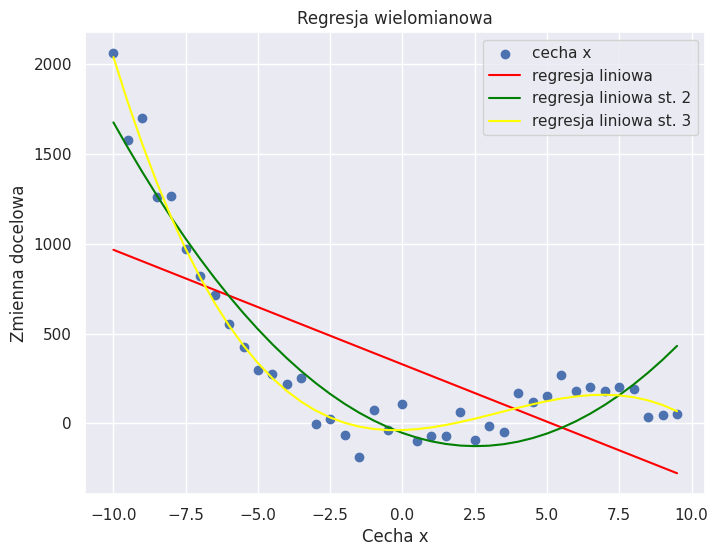

In [23]:
poly_3_regressor = LinearRegression()
poly_3_regressor.fit(X_poly_3, y)
y_pred_3 = poly_3_regressor.predict(X_poly_3)

plt.figure(figsize = (8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label = 'cecha x')
plt.plot(X, y_pred_lin, c = 'red', label = 'regresja liniowa')
plt.plot(X, y_pred_2, c = 'green', label = 'regresja liniowa st. 2')
plt.plot(X, y_pred_3, c = 'yellow', label = 'regresja liniowa st. 3')
plt.legend()
plt.plot()

In [25]:
r2_score(y_pred_3, y)

0.9757846607737797

Porównanie metryk

In [26]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [29]:
results = pd.DataFrame(data = {'name':['regresja liniowa', 'regresja wielomianowa st. 2', 'regresja wielomianowa st. 3'],
                        'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
                        'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
                        'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
                        'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]
                        })

results

,name,r2_score,mae,mse,rmse
0,regresja liniowa,0.476265,329.613293,149406.113168,386.530870
1,regresja wielomianowa st. 2,0.886654,148.064241,32334.357353,179.817567
2,regresja wielomianowa st. 3,0.976357,64.674172,6744.602680,82.125530


In [32]:
px.bar(results, x = 'name', y = 'r2_score', width = 700, title = 'regresja wielomianowa R2_score')

In [33]:
px.bar(results, x = 'name', y = 'mae', width = 700, title = 'regresja wielomianowa mae')

In [34]:
px.bar(results, x = 'name', y = 'mse', width = 700, title = 'regresja wielomianowa mse')

In [35]:
px.bar(results, x = 'name', y = 'rmse', width = 700, title = 'regresja wielomianowa rmse')